In [1]:
import pandas as pds
import numpy as npy

In [2]:
spar = pds.read_csv('brazil_covid19.csv',index_col='date')

In [3]:
spar

,region,state,cases,Death
date,,,,
2/25/2020,Centro-Oeste,DF,0,0
2/25/2020,Centro-Oeste,GO,0,0
2/25/2020,Centro-Oeste,MS,0,0
2/25/2020,Centro-Oeste,MT,0,0
2/25/2020,Nordeste,AL,0,0
...,...,...,...,...
9/1/2020,Sudeste,RJ,226800,16217
9/1/2020,Sudeste,SP,814375,30375
9/1/2020,Sul,PR,133574,3345


In [4]:
spar.describe()

,cases,Death
count,5130.000000,5130.000000
mean,40285.003314,1514.053801
std,77273.014685,3353.260704
min,0.000000,0.000000
25%,274.250000,9.000000
50%,9452.500000,281.000000
75%,52593.750000,1594.000000
max,814375.000000,30375.000000


In [5]:
spar.values

array([['Centro-Oeste', 'DF', 0, 0],
       ['Centro-Oeste', 'GO', 0, 0],
       ['Centro-Oeste', 'MS', 0, 0],
       ...,
       ['Sul', 'PR', 133574, 3345],
       ['Sul', 'RS', 127799, 3501],
       ['Sul', 'SC', 180474, 2301]], dtype=object)

In [6]:
spar[spar['cases']>100000].head()

,region,state,cases,Death
date,,,,
5/29/2020,Sudeste,SP,101556,7275
5/30/2020,Sudeste,SP,107142,7532
5/31/2020,Sudeste,SP,109698,7615
6/1/2020,Sudeste,SP,111296,7667
6/2/2020,Sudeste,SP,118295,7994


In [7]:
das = pds.DataFrame(spar, columns=['state','cases','Death'])

In [8]:
das

,state,cases,Death
date,,,
2/25/2020,DF,0,0
2/25/2020,GO,0,0
2/25/2020,MS,0,0
2/25/2020,MT,0,0
2/25/2020,AL,0,0
...,...,...,...
9/1/2020,RJ,226800,16217
9/1/2020,SP,814375,30375
9/1/2020,PR,133574,3345


In [9]:
das['Active cases'] = das['cases'] - das['Death']
das.sort_values('Active cases', ascending=False)

,state,cases,Death,Active cases
date,,,,
9/1/2020,SP,814375,30375,784000
8/31/2020,SP,804342,30014,774328
8/30/2020,SP,803404,29978,773426
8/29/2020,SP,801422,29944,771478
8/28/2020,SP,796209,29694,766515
...,...,...,...,...
3/8/2020,RS,0,0,0
3/8/2020,SC,0,0,0
3/9/2020,GO,0,0,0


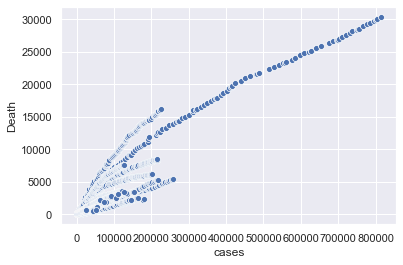

In [10]:
import seaborn as sns 
sns.set()
graph = sns.scatterplot(x='cases', y= 'Death', data=das)
graph

In [11]:
from bokeh.plotting import figure,show
from bokeh.models import HoverTool

In [19]:
TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("(cases,Death)", "(@cases, @Death)"),
    ("state", "@state")]
)

p = figure(title="Brazil covid19", x_axis_label='cases', y_axis_label='Death', plot_width=700, plot_height=700, tools=[TOOLTIPS])
p.circle('cases', 'Death', size=10, source=das)

GlyphRenderer(id='1458', ...)

In [20]:
show(p)